In [27]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.anova import anova_lm


In [6]:
AC15 = pd.read_csv('AC15.csv', delimiter=',')
y = np.array(AC15['LOGTN'])
AC15 = AC15.drop('LOGTN', axis = 1)
AC15.columns

Index(['LOGCA', 'LOGIMP', 'MMJTEMP', 'MSRAIN', 'PRES', 'PNON', 'PCOMM',
       'PIND'],
      dtype='object')

### PRESS

In [7]:
def press():
    y = np.array(AC15['LOGTN'])
    for column in AC15: #dependant variable 
        X1 = np.array(AC15[column])
        X2 = np.array(AC15[column])
        combination = np.column_stack((X1, X2))
        X_train, X_test, Y_train, Y_test = train_test_split(combination, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y)
        y_pred = model.predict(X_test)
        print(' residual sum of squares for', column, 'is : '+ str(np.sum(np.square(y_pred - y))))

In [8]:


columns = AC15.columns
names_final = []
rss_final = []
for i in range(1, len(columns)+1):
    combinations = itertools.combinations(columns, i)
    for combination in combinations:
        # Create a new DataFrame with the selected columns
        subset_df = AC15[list(combination)]
        matrix = subset_df.to_numpy()

        # print(f"Combination: {combination}")
        X_train, X_test, Y_train, Y_test = train_test_split(matrix, y, test_size=0.2, random_state=42)
        # print(X_train)
        model = LinearRegression()
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        rss = np.sum(np.square(y_pred - Y_test))
        names_final.append(combination)
        rss_final.append(rss)
        # print(' residual sum of squares for', combination, 'is : '+ str(np.sum(np.square(y_pred - Y_test))))
        # print(matrix)

In [9]:
combinations_df = pd.DataFrame(rss_final, names_final)
min = combinations_df.min(axis=0)
print('Lowest residual sum of squares is:', min)
best_model = combinations_df[combinations_df[0] < 1.49]
best_model

Lowest residual sum of squares is: 0    1.478086
dtype: float64


,0
"(LOGCA, LOGIMP, PRES, PIND)",1.478086


### ANOVA (First output is just for linear, the second is every combo)

In [10]:
AC15 = pd.read_csv('AC15.csv', delimiter=',')
formula = "LOGTN ~ LOGCA + LOGIMP + MMJTEMP + MSRAIN + PRES + PNON + PCOMM + PIND"
model = smf.ols(formula=formula, data=AC15).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)


             sum_sq    df          F    PR(>F)
LOGCA      9.037339   1.0  24.401890  0.000022
LOGIMP     0.854484   1.0   2.307208  0.138299
MMJTEMP    1.016542   1.0   2.744784  0.107051
MSRAIN     2.004454   1.0   5.412265  0.026283
PRES       0.009888   1.0   0.026698  0.871204
PNON       0.007690   1.0   0.020763  0.886304
PCOMM      0.008500   1.0   0.022952  0.880505
PIND       0.003784   1.0   0.010216  0.920102
Residual  12.221684  33.0        NaN       NaN


In [14]:
AC15 = pd.read_csv('AC15.csv', delimiter=',')

predictors = ['LOGCA', 'LOGIMP', 'MMJTEMP', 'MSRAIN', 'PRES', 'PNON', 'PCOMM', 'PIND']
response = 'LOGTN'
residuals_final = []
combo_names = []
for r in range(1, len(predictors) + 1):
    for combo in combinations(predictors, r):
        formula = f"{response} ~ {' + '.join(combo)}"
        model = smf.ols(formula=formula, data=AC15).fit()
        anova_results = sm.stats.anova_lm(model, typ=2)
        print(f"\nFormula: {formula}")
        # residuals = model.resid
        # combo_names.append(combo)
        # residuals_final
        print(anova_results)


Formula: LOGTN ~ LOGCA
             sum_sq    df          F    PR(>F)
LOGCA      9.562420   1.0  18.788409  0.000096
Residual  20.358125  40.0        NaN       NaN

Formula: LOGTN ~ LOGIMP
             sum_sq    df         F    PR(>F)
LOGIMP     0.099403   1.0  0.133332  0.716926
Residual  29.821142  40.0       NaN       NaN

Formula: LOGTN ~ MMJTEMP
             sum_sq    df        F    PR(>F)
MMJTEMP    1.254697   1.0  1.75079  0.193292
Residual  28.665848  40.0      NaN       NaN

Formula: LOGTN ~ MSRAIN
             sum_sq    df        F    PR(>F)
MSRAIN     2.013891   1.0  2.88661  0.097085
Residual  27.906654  40.0      NaN       NaN

Formula: LOGTN ~ PRES
             sum_sq    df         F   PR(>F)
PRES       2.586784   1.0  3.785478  0.05875
Residual  27.333761  40.0       NaN      NaN

Formula: LOGTN ~ PNON
             sum_sq    df         F    PR(>F)
PNON       0.053230   1.0  0.071288  0.790842
Residual  29.867315  40.0       NaN       NaN

Formula: LOGTN ~ PCOMM
        

#### (C) Plot the historical and modeled values with 95% confidence interval along with 1:1 line for visual inspection of the model performance

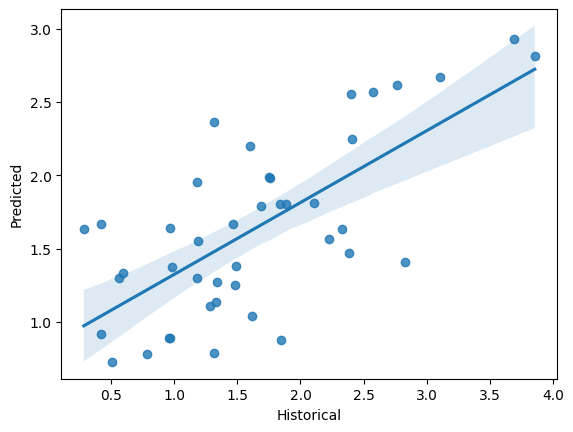

In [ ]:
AC15 = pd.read_csv('AC15.csv', delimiter=',')
formula = "LOGTN ~ LOGCA + LOGIMP + PRES + PIND"
model = smf.ols(formula=formula, data=AC15).fit()
predictions = model.get_prediction(AC15)
LOGTN_pred = predictions.predicted_mean
LOGTN_pred
sns.regplot(x = y, y = LOGTN_pred)
plt.xlabel('Historical')
plt.ylabel('Predicted')
plt.title
plt.show()

In [ ]:

conf_int = predictions.conf_int(alpha=0.05)  # 95% CI

lower_bound = conf_int[:, 0]
upper_bound = conf_int[:, 1]

[ 2.09429399 -0.35046329  1.24784048  1.70728837  0.70444664  0.56163952
  1.00773089  2.35695623  0.4493832   1.35235192  1.52107828  0.69668503
  1.30272954  0.9460815   0.05458192  1.28680376  1.06215188  1.26259874
  1.25578803  1.63816939  0.41717107  0.41855028  2.4407544   0.22298621
  1.0804063   1.92101633  1.42813824  2.22392706  1.87481718  1.46557384
  0.69718865  0.95422924  1.01746094  0.86911961  1.26257959  2.03954577
  1.53640472  1.26017357  2.16601597  2.19822643  0.36289163  0.87327441]
[3.03904468 1.91737466 1.85506275 2.24975101 1.89849719 1.51220841
 1.81261887 3.27301805 1.38413498 1.97863112 2.08271189 1.57165799
 2.03159001 1.71822099 1.39735588 2.62404149 1.7060112  1.86393097
 2.02789388 2.34339886 1.3614026  1.36329335 3.42040059 1.52833024
 1.85392866 2.56783341 2.19127974 3.00494275 2.52584228 2.11645782
 1.51215636 1.59163329 1.72758987 1.72399389 2.00042666 2.68506258
 2.07542956 2.00886171 2.93762045 3.13880085 1.21386239 1.63290864]


#### (D) Estimate the Skill of the model by repeatedly dropping 10% of the points - drop 10% of the points, fit the best model to the rest and predict the dropped points; compute skill measured - R and RMSE. Boxplot the skill measures

In [53]:
AC15 = pd.read_csv('AC15.csv', delimiter=',')

def skill():
    rmse_final = []
    R = []
    for i in range(0,20):
        predictor = AC15[['LOGCA', 'LOGIMP', 'PRES', 'PIND']]
        y = np.array(AC15['LOGTN'])
        X_train, X_test, y_train, y_test = train_test_split(predictor,y, test_size=0.1, shuffle=True) 
        formula = "LOGTN ~ LOGCA + LOGIMP + PRES + PIND"
        train_data = X_train.copy()
        train_data['LOGTN'] = y_train
        model = smf.ols(formula=formula, data=train_data).fit()
        test_data = X_test.copy()
        test_data['LOGTN'] = y_test  # Include target variable for comparison
        predictions = model.get_prediction(test_data)
        LOGTN_pred = predictions.predicted


        error = y_test - LOGTN_pred
        mse = np.mean(error ** 2)  # Mean Squared Error
        rmse = np.sqrt(mse)  # Root Mean Squared Error
        rmse_final.append(rmse)
        
        # Calculate R-squared
        y_mean = y.mean()
        SSt = np.sum((y_test - y_mean) ** 2)  # Total Sum of Squares (test data)
        se = np.sum(error ** 2)  # Residual Sum of Squares
        R2 = 1 - (se / SSt)  # R-squared
        R.append(R2)
    
    return rmse_final, R

In [54]:
skill()

([np.float64(0.44857309168712894),
  np.float64(0.8841062079736912),
  np.float64(1.0034355257253766),
  np.float64(1.1275615044328382),
  np.float64(0.8004776141280776),
  np.float64(0.470634065410544),
  np.float64(0.8386176632806854),
  np.float64(0.9858417348828),
  np.float64(0.4524791790594404),
  np.float64(0.6621315485328308),
  np.float64(0.7000476359565597),
  np.float64(0.9831578185570803),
  np.float64(0.8019079499186513),
  np.float64(0.35700561475866305),
  np.float64(0.7149006823626529),
  np.float64(0.4979671597455253),
  np.float64(0.7062700900986817),
  np.float64(0.725252488001281),
  np.float64(0.7824922507777288),
  np.float64(0.7134944637989658)],
 [np.float64(0.7459388453223965),
  np.float64(0.49900853934610545),
  np.float64(-0.010000279223242314),
  np.float64(-0.21037041436587356),
  np.float64(-0.09648785006292693),
  np.float64(0.5994926579917326),
  np.float64(0.15772594671219498),
  np.float64(0.48827669450598954),
  np.float64(0.5669478014441064),
  np.f

In [55]:
rmse_final, R = skill()
print(rmse_final)
print(R)

[np.float64(0.6839094422271219), np.float64(0.1688606344953048), np.float64(0.9224870188823643), np.float64(1.141773232265355), np.float64(0.701272293676541), np.float64(0.6192342409696259), np.float64(0.590095060719304), np.float64(0.9529147078148189), np.float64(1.111601817525969), np.float64(0.8457097215402255), np.float64(0.29447084801424295), np.float64(0.9352233817343967), np.float64(0.49043132173923487), np.float64(0.8892306020159185), np.float64(0.5409097355270407), np.float64(0.5745734765898818), np.float64(0.3366161171671674), np.float64(0.3462308694277776), np.float64(0.4934523090498653), np.float64(0.8131244426306509)]
[np.float64(0.16742276581730675), np.float64(0.4176189902248796), np.float64(-1.3503901656600155), np.float64(-1.2219201322070945), np.float64(0.44915419267766465), np.float64(0.034685177342419604), np.float64(-0.447246881642964), np.float64(-1.0529310380681518), np.float64(0.3023102088348444), np.float64(0.057840535799299264), np.float64(0.880389315944352), 

Text(0.5, 1.0, 'RMSE after 20 model iterations')

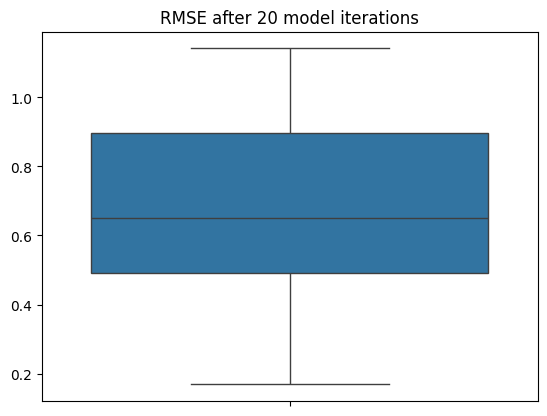

In [56]:
sns.boxplot(rmse_final)
plt.title('RMSE after 20 model iterations')

Text(0.5, 1.0, 'R^2 values after 20 model iterations')

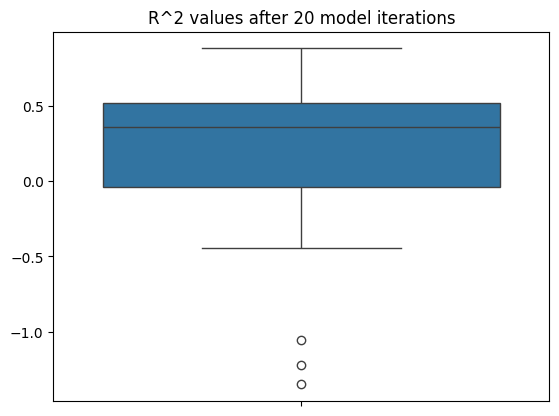

In [57]:
sns.boxplot(R)
plt.title('R^2 values after 20 model iterations')